In [1]:
# Data Wrangling II 
# Create an “Academic performance” dataset of students and perform the following operations using 
# Python. 
 
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
# inconsistencies, use any of the suitable techniques to deal with them.   
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
# techniques to deal with them.  
# 3. Apply data transformations on at least one of the variables. The purpose of this 
# transformation should be one of the following reasons: to change the scale for better 
# understanding of the variable, to convert a non-linear relation into a linear one, or to 
# decrease the skewness and convert the distribution into a normal distribution.  
 
# Reason and document your approach properly. 

In [2]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
 # Importing libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [1]:
def DetectOutlier(df,var):
 # IQR method is used to deal with outliers
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  count = df[(df[var] > high) | (df[var] < low)][var].count()
  print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
  df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
  print('Outliers : \n', len(df1))
  print(df1.T)
  df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
  return(df)

In [4]:
# Reading dataset
df = pd.read_csv('academic.csv')

In [5]:
# Display basic information
print('Information of Dataset:\n', df.info)

Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

In [7]:
print('Shape of Dataset (row x column): ', df.shape)

Shape of Dataset (row x column):  (480, 17)


In [8]:
print('Columns Name: ', df.columns)

Columns Name:  Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [9]:
print('Total elements in dataset:', df.size)

Total elements in dataset: 8160


In [10]:
print('Datatype of attributes (columns):', df.dtypes)

Datatype of attributes (columns): gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources              int64
AnnouncementsView             int64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object


In [11]:
print('First 5 rows:\n', df.head().T)

First 5 rows:
                                    0           1           2           3  \
gender                             M           M           M           M   
NationalITy                       KW          KW          KW          KW   
PlaceofBirth                  KuwaIT      KuwaIT      KuwaIT      KuwaIT   
StageID                   lowerlevel  lowerlevel  lowerlevel  lowerlevel   
GradeID                         G-04        G-04        G-04        G-04   
SectionID                          A           A           A           A   
Topic                             IT          IT          IT          IT   
Semester                           F           F           F           F   
Relation                      Father      Father      Father      Father   
raisedhands                     15.0         NaN        10.0        30.0   
VisITedResources                  16          20           7          25   
AnnouncementsView                  2           3           0           5 

In [12]:
print('Any 5 rows:\n',df.sample(5).T)

Any 5 rows:
                                  44          385         170         65   \
gender                             F           F           M           M   
NationalITy                       KW        Iraq          KW          KW   
PlaceofBirth                  KuwaIT        Iraq      KuwaIT      KuwaIT   
StageID                   HighSchool  lowerlevel  lowerlevel  HighSchool   
GradeID                         G-09        G-02        G-02        G-12   
SectionID                          A           B           B           A   
Topic                             IT      Arabic      French     English   
Semester                           F           S           S           F   
Relation                      Father         Mum      Father      Father   
raisedhands                     33.0        79.0        40.0        13.0   
VisITedResources                  33          93          62           5   
AnnouncementsView                 30          49          83          18   

In [13]:
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe())


Statistical information of Numerical Columns: 
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   478.000000        480.000000         480.000000  480.000000
mean     46.939331         54.797917          37.918750   43.283333
std      31.375699         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.000000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     170.000000         99.000000          98.000000   99.000000


In [14]:
 # Display Null values
print('Total Number of Null Values in Dataset: \n', df.isna().sum())

Total Number of Null Values in Dataset: 
 gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [9]:
 # Fill the missing values
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)
print('Total Number of Null Values in Dataset: \n', df.isna().sum())

Total Number of Null Values in Dataset: 
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


C:\Users\Aishwarya Bhansali\AppData\Local\Temp\ipykernel_13424\3014334111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)


In [16]:
 # Converting categorical to numeric using Find and replace method
df['Relation']=df['Relation'].astype('category')
df['Relation']=df['Relation'].cat.codes

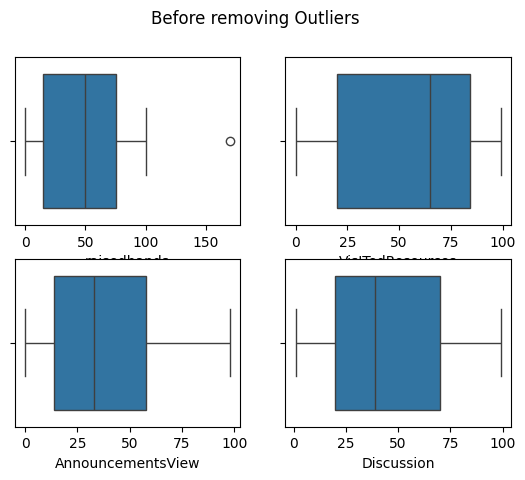

In [17]:
 # Outliers can be visualized using boxplot
 # using seaborn library we can plot the boxplot
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()


Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


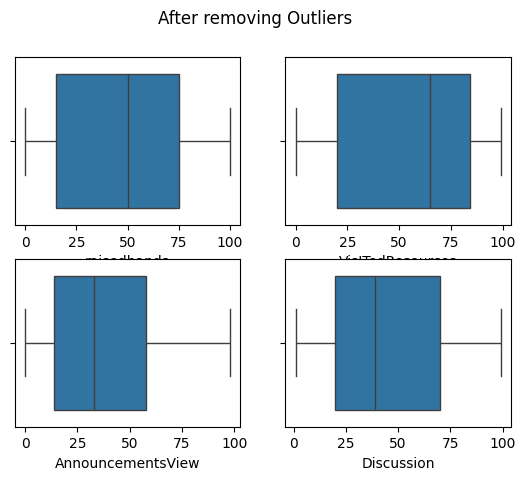

In [18]:
#Display and remove outliers
df = DetectOutlier(df, 'raisedhands')
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])

sns.boxplot(data = df, x ='VisITedResources', ax= axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax= axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax= axes[1,1])
plt.show()

---------------- Data Skew Values before Yeo John Transformation ----------------------
raisedhands:  0.028374079559687623
VisITedResources:  -0.3388404568312024
AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617
---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView:  -0.1800377395845211
Discussion:  -0.13328782723929383


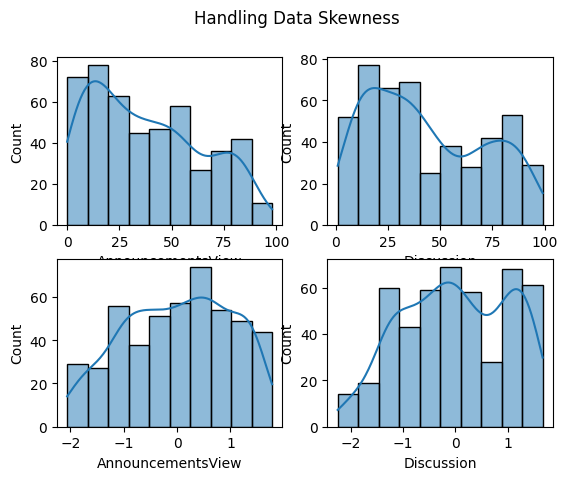

In [19]:
 print('---------------- Data Skew Values before Yeo John Transformation ----------------------')
 # There are two types
 # 1. Left skew
 # 2. Right skew
 # Formula to find out data skewness = 3*(mean-median)/std
 # = 0 (no skew) print
 # = negative (Negative skew) left skewed data
 # = positve (Positive skew) Right skewed data
 # = -0.5 to 0 to 0.5 (acceptable skew)
 # = -0.5> <-1 moderate negative skew
 # = 0.5> <1 moderate positive skew
 # = > -1 high negative
 # = > 1 high positive

# Checking skewness for 'raisedhands' column
print('raisedhands: ', df['raisedhands'].skew())
 
# Checking skewness for 'VisITedResources' column
print('VisITedResources: ', df['VisITedResources'].skew())

# Checking skewness for 'AnnouncementsView' column
print('AnnouncementsView: ', df['AnnouncementsView'].skew())

# Checking skewness for 'Discussion' column
print('Discussion: ', df['Discussion'].skew())

# Create subplots to visualize data distribution before and after transformation
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')

# Plot histogram for 'AnnouncementsView' before transformation
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)

# Plot histogram for 'Discussion' before transformation
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)

# Apply Yeo-Johnson Power Transformation to handle skewness
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)

# Transform 'AnnouncementsView' column
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))

# Transform 'Discussion' column
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))

# Print skewness values after transformation
print('---------------- Data Skew Values after Yeo John Transformation ----------------------')
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

# Plot histogram for 'AnnouncementsView' after transformation
sns.histplot(ax = axes[1,0], data = df['AnnouncementsView'], kde=True)

# Plot histogram for 'Discussion' after transformation
sns.histplot(ax = axes[1,1], data =df['Discussion'], kde=True)

# Display the plots
plt.show()
 
